# Installing Required packages

In [2]:
pip install opencv-python numpy tensorflow keras scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\chetu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install tensorflow keras scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\chetu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install pandas


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\chetu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: streamlit in c:\users\chetu\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (1.44.0)




[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\chetu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [26]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/294.9 kB 1.4 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\chetu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


 # Load and Preprocess Dataset

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from collections import Counter

IMG_SIZE = (128, 128)
label_map = {"blue": 0, "green": 1, "brown": 2, "gray": 3}
label_map_reverse = {v: k for k, v in label_map.items()}

def load_images(dataset_path):
    images, labels = [], []
    for label_name in label_map:
        class_path = os.path.join(dataset_path, label_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, IMG_SIZE)
            img = img / 255.0
            images.append(img)
            labels.append(label_map[label_name])
    return np.array(images), np.array(labels)

# Replace with your dataset directory
DATASET_PATH = "./eye_images"
X, y = load_images(DATASET_PATH)
print(f"Dataset loaded: {X.shape}, Labels: {y.shape}")


Dataset loaded: (80, 128, 128, 3), Labels: (80,)


In [2]:
# 📊 Check Class Distribution and Compute Class Weights
# ------------------------
counts = Counter(y)
for k, v in counts.items():
    print(f"{label_map_reverse[k]}: {v}")

class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

blue: 20
green: 20
brown: 20
gray: 20
Class weights: {0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0), 3: np.float64(1.0)}


In [3]:
# ------------------------
# 🧠 Prepare Data for Training
# ------------------------
y_cat = to_categorical(y, num_classes=4)

X_train, X_val, y_train, y_val = train_test_split(
    X, y_cat, test_size=0.2, stratify=y, random_state=42
)


In [5]:
# ------------------------
# 🏗️ Define CNN Model with Transfer Learning (MobileNetV2)
# ------------------------
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(128,128,3))
base_model.trainable = False  # Freeze base model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
# ------------------------
# 🏋️‍♀️ Train Model (Initial Training)
# ------------------------
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop]
)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.2812 - loss: 2.3361 - val_accuracy: 0.0625 - val_loss: 2.5087
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step - accuracy: 0.2188 - loss: 2.5748 - val_accuracy: 0.0625 - val_loss: 2.2825
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step - accuracy: 0.2917 - loss: 1.9728 - val_accuracy: 0.0625 - val_loss: 2.1272
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step - accuracy: 0.2812 - loss: 1.9392 - val_accuracy: 0.1250 - val_loss: 2.0325
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step - accuracy: 0.2396 - loss: 1.8865 - val_accuracy: 0.0625 - val_loss: 1.9845
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step - accuracy: 0.2396 - loss: 1.7943 - val_accuracy: 0.0625 - val_loss: 1.9722
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step - accuracy: 0.2708 - loss: 1.8185 - val_accuracy: 0.0625 - val_loss: 1.9772
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step - accuracy: 0.3646 - loss: 1.5851 - val_accuracy: 0.0625 - val_loss: 1

In [8]:
import pickle

# Save history
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

# Load history in a new session
with open('history.pkl', 'rb') as f:
    history_data = pickle.load(f)
    
model.save('my_model.keras') 


In [7]:
# ------------------------
# 🔧 Fine-Tune Model (Unfreeze Base Model)
# ------------------------
base_model.trainable = True
model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

fine_tune_history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop]
)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 62s 6s/step - accuracy: 0.4062 - loss: 1.5893 - val_accuracy: 0.3750 - val_loss: 1.5637
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.3333 - loss: 1.7416 - val_accuracy: 0.3750 - val_loss: 1.5692
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.3958 - loss: 1.6558 - val_accuracy: 0.3750 - val_loss: 1.5754
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.4792 - loss: 1.4653 - val_accuracy: 0.3750 - val_loss: 1.5816
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.4375 - loss: 1.4980 - val_accuracy: 0.3750 - val_loss: 1.5867
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4688 - loss: 1.5260 - val_accuracy: 0.4375 - val_loss: 1.5934
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.5729 - loss: 0.9391 - val_accuracy: 0.4375 - val_loss: 1.6012
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.4896 - loss: 1.1554 - val_accuracy: 0.4375 - val_loss: 1.6095
Epoch 9/20
2/2 

In [53]:
import pickle

# Save history
with open('fine_tune_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

# Load history in a new session
with open('fine_tune_history.pkl', 'rb') as f:
    history_data = pickle.load(f)
    
model.save('my_model.keras') 

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

Classification Report:

              precision    recall  f1-score   support

        blue       1.00      0.25      0.40         4
       green       0.33      0.25      0.29         4
       brown       0.25      0.25      0.25         4
        gray       0.38      0.75      0.50         4

    accuracy                           0.38        16
   macro avg       0.49      0.38      0.36        16
weighted avg       0.49      0.38      0.36        16



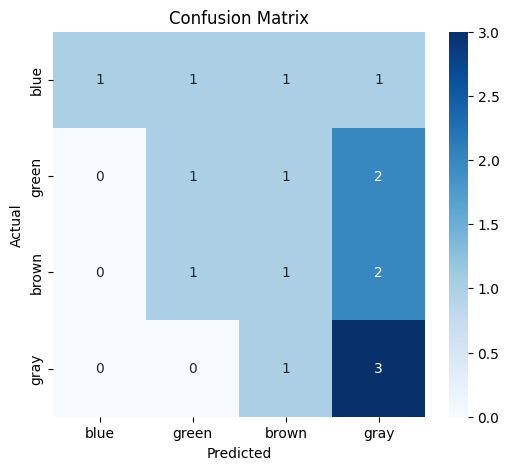

In [9]:
# ------------------------
# 🧪 Evaluate Model
# ------------------------
preds = model.predict(X_val)
y_true = np.argmax(y_val, axis=1)
y_pred = np.argmax(preds, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=label_map.keys()))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=label_map.keys(), yticklabels=label_map.keys(), cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


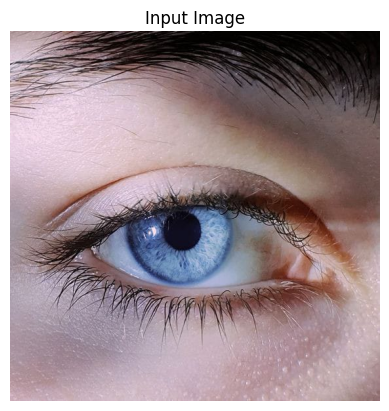

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
blue: 0.11
green: 0.18
brown: 0.67
gray: 0.05
Predicted Eye Color: brown


In [10]:
# ------------------------
# 🔍 Prediction Function for Single Image
# ------------------------

def preprocess_image(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=IMG_SIZE)
    img = tf.keras.utils.img_to_array(img)
    img = img / 255.0
    return np.expand_dims(img, axis=0)

def predict_eye_color(model, img_path):
    img = preprocess_image(img_path)
    predictions = model.predict(img)[0]
    for i, prob in enumerate(predictions):
        print(f"{list(label_map.keys())[i]}: {prob:.2f}")
    return list(label_map.keys())[np.argmax(predictions)]


image=cv2.imread("./predicting_images/img5.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.title("Input Image")
plt.show()

predicted = predict_eye_color(model, "./predicting_images/img2.jpeg")
print("Predicted Eye Color:", predicted)


# Read the Random Image from the Dataset

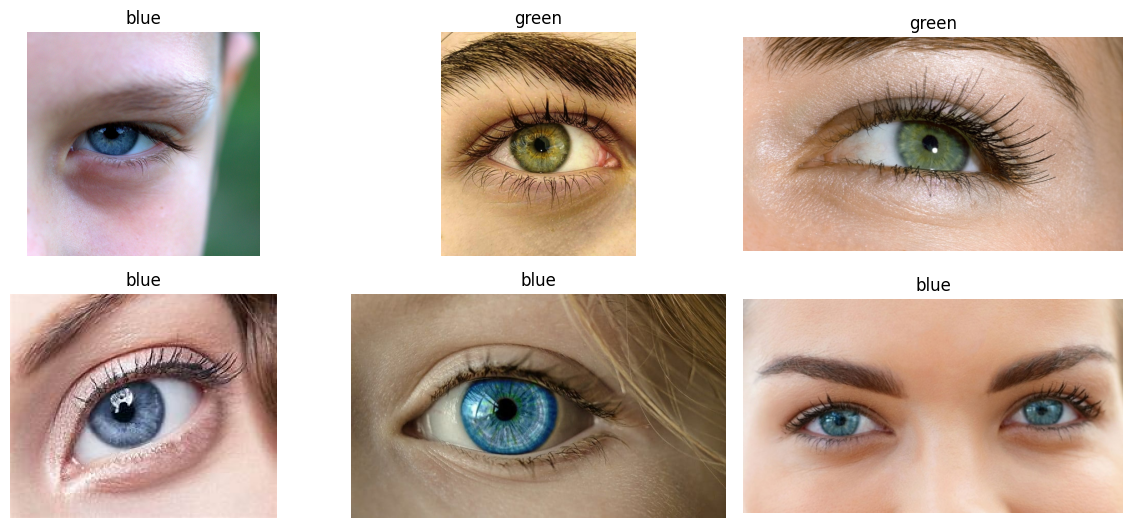

In [7]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_img(DATASET_PATH, num_images=6):
    image_paths = []
    labels = []

    # Walk through dataset directory and collect image paths and labels
    for root, dirs, files in os.walk(DATASET_PATH):
        for file in files:
            if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp')):
                full_path = os.path.join(root, file)
                label = os.path.basename(root)
                image_paths.append(full_path)
                labels.append(label)

    # Select random indices
    selected_indices = random.sample(range(len(image_paths)), min(num_images, len(image_paths)))

    # Plotting
    plt.figure(figsize=(12, 8))
    for i, idx in enumerate(selected_indices):
        img = mpimg.imread(image_paths[idx])
        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.title(labels[idx])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
display_img(DATASET_PATH, num_images=6)



# Bar Plot

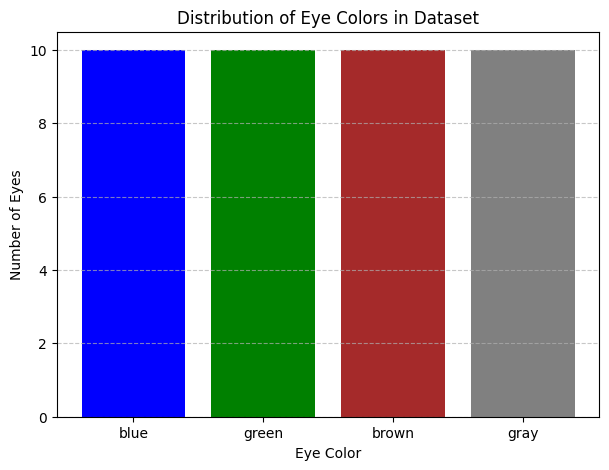

In [8]:
from collections import Counter

# Count the occurrences of each label
label_map_reverse = {0: "blue", 1: "green", 2: "brown", 3:"gray"}
label_counts = Counter(y)

# Extract labels and counts
labels = [label_map_reverse[key] for key in label_counts.keys()]
counts = list(label_counts.values())

# Plot the bar chart
plt.figure(figsize=(7, 5))
plt.bar(labels, counts, color=["blue", "green", "brown","gray"])  # Set colors
plt.xlabel("Eye Color")
plt.ylabel("Number of Eyes")
plt.title("Distribution of Eye Colors in Dataset")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Build CNN Model

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np

# Shuffle and split
X, y = shuffle(X, y, random_state=42)
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Image augmentation

datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.2,
    brightness_range=[0.6, 1.3],
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# ✅ Build model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Dropout(0.3),
    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # 4 classes: blue, green, brown, gray
])

# ✅ Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Callbacks
early_stop = EarlyStopping( monitor='val_accuracy', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

# ✅ Train
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
          validation_data=(X_val, y_val),
          epochs=30,
          callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])




C:\Users\chetu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\chetu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.2812 - loss: 2.0318 - val_accuracy: 0.2500 - val_loss: 3.1870
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2812 - loss: 5.0424 - val_accuracy: 0.2500 - val_loss: 6.0600
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 2.1509 - val_accuracy: 0.2500 - val_loss: 7.0228
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2812 - loss: 4.4641 - val_accuracy: 0.2500 - val_loss: 8.0733
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 16.6876 - val_accuracy: 0.2500 - val_loss: 9.9892
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 10.5710 - val_accuracy: 0.2500 - val_loss: 14.2172
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1562 - loss: 10.8869 - val_accuracy: 0.2500 - val_loss: 18.8176
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1875 - loss: 17.9469 - val_accuracy: 0.2500 - val_loss: 22.9612
Epoch 9

# Save the model

In [10]:
import pickle

# Save history
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

# Load history in a new session
with open('history.pkl', 'rb') as f:
    history_data = pickle.load(f)
    
model.save('my_model.keras') 


# Load the Saved Model

In [11]:
#LOADS THE SAVED MODEL
from tensorflow.keras.models import load_model

model = load_model('my_model.keras')

In [12]:
print(model.input_shape)

(None, 128, 128, 3)


# Evaluate the model

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - accuracy: 0.2396 - loss: 3.0257
Test Accuracy: 0.2500
Test Loss: 2.9564


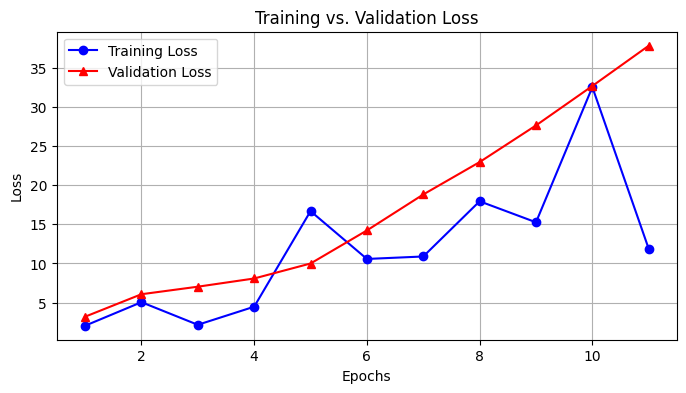

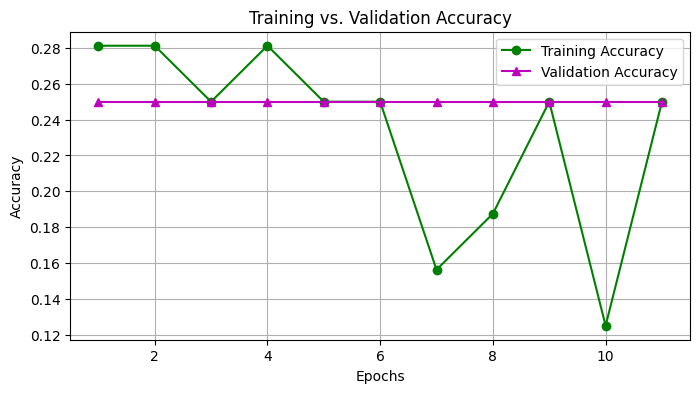

In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X, y, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Extract loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get number of epochs
epochs = range(1, len(train_loss) + 1)

# 📌 Plot Training & Validation Loss
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')  # 'bo-' means blue circles
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')  # 'r^-' means red triangles
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# 📌 Plot Training & Validation Accuracy
plt.figure(figsize=(8, 4))
plt.plot(epochs, train_acc, 'go-', label='Training Accuracy')  # 'go-' means green circles
plt.plot(epochs, val_acc, 'm^-', label='Validation Accuracy')  # 'm^-' means magenta triangles
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Testing the Model

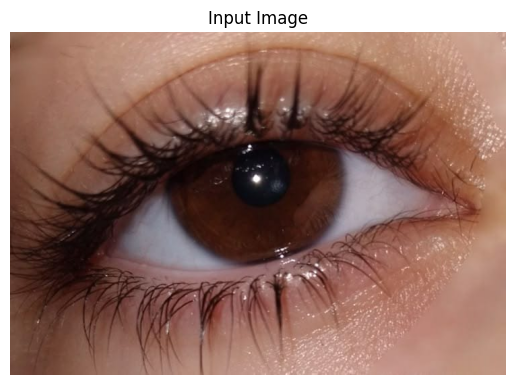

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Raw Predictions: [[0.24410982 0.34740123 0.12247935 0.2860096 ]]
Predicted Eye Color: green


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

IMG_SIZE = (128, 128)
# Load the image 
#image_path = "C:\\Users\\HP\\Pictures\\dog3.jpeg"
#image_path = "C:\\Users\\HP\\Pictures\\dog2.jpg"
#image_path = "C:\\Users\\HP\\Pictures\\dog1.jpg"
image_path = "./predicting_images/img2.jpeg"

image = cv2.imread(image_path)

if image is None:
    print(f"❌ Failed to load image from: {image_path}")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.title("Input Image")
plt.show()

# Preprocess the image (Resize if needed)
input_image = cv2.resize(image, IMG_SIZE)  # Adjust size if your model needs specific dimensions
input_image = np.array(input_image) / 255.0  # Normalize
input_image = np.expand_dims(input_image, axis=0)  # Add batch dimension

# Ensure model is loaded
if model is None:
    print("Error: Model is not loaded!")
    
else:
    # Make a prediction
    predictions = model.predict(input_image)
    
    # Print raw prediction scores
    print(f"Raw Predictions: {predictions}")

    class_names = ["blue", "green", "brown", "gray"]
    predicted_class = class_names[np.argmax(predictions)]

print(f"Predicted Eye Color: {predicted_class}")


In [15]:
color_classes = ["blue", "green", "brown", "gray"]
for i, prob in enumerate(predictions[0]):
    print(f"{color_classes[i]}: {prob:.2f}")


blue: 0.00
green: 0.94
brown: 0.04
gray: 0.01


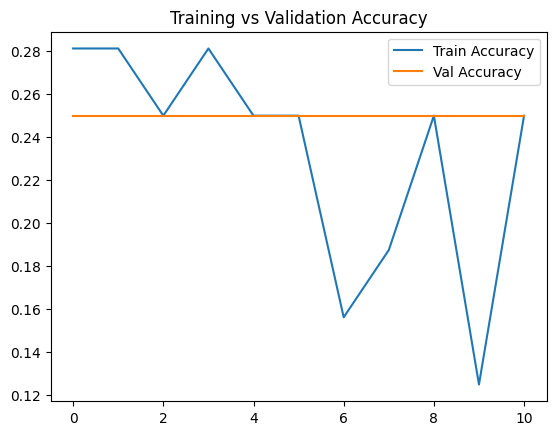

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


In [ ]:

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define input shape
input_shape = (128, 128, 3)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze base model layers
base_model.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(4, activation='softmax')(x)  # 4 classes: blue, green, brown, gray

# Define final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])




Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [18]:

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.2,
    brightness_range=[0.6, 1.3],
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Create generators
train_gen = datagen.flow(X, y, batch_size=32, subset='training')
val_gen = datagen.flow(X, y, batch_size=32, subset='validation')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(train_gen,
                    epochs=20,
                    validation_data=val_gen,
                    callbacks=[early_stop])


Epoch 1/20


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 4)